In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# Kaggle API
import os
os.environ['KAGGLE_USERNAME'] = "apanpa"
os.environ['KAGGLE_KEY'] = "e7615325d329785bb9ff5a0df0a5c06d"

In [3]:
# Downloading the dataset directly from Kaggle on the Colab environment 
!kaggle competitions download -c house-prices-advanced-regression-techniques


house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
# Unzipping the dataset
#! unzip/edit/Desktop/DataScience/kaggel/house-prices-advanced-regression-techniques.zip
! unzip house-prices-advanced-regression-techniques.zip -d train 

'unzip' is not recognized as an internal or external command,
operable program or batch file.


# Importing some required Libraries

In [5]:
#Import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy import stats
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')


from scipy import stats
from scipy.stats import norm, skew

# Exploratory data analysis
* Read the data files

In [6]:
#importing the data into dataframes
train_data = pd.read_csv('train_house.csv',low_memory=False)
test_data = pd.read_csv('test_house.csv',low_memory=False)

**First 5 rows of the train dataset**

In [7]:
#checking the shapes of dataframes
print(train_data.shape, test_data.shape)

(1460, 81) (1459, 80)


In [8]:
#inspecting the first few rows of the train dataframe
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
#checking for columns infomation 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Check for null values**

In [10]:
#counts of missing values
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
#display of columns name
train_data.columns.unique()

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [12]:
# Total count of columns
train_data.columns.nunique()

81

In [13]:
#Getting unique values on the train data
for col in train_data.columns:
    print(f"{col} - {train_data[col].nunique()}")

Id - 1460
MSSubClass - 15
MSZoning - 5
LotFrontage - 110
LotArea - 1073
Street - 2
Alley - 2
LotShape - 4
LandContour - 4
Utilities - 2
LotConfig - 5
LandSlope - 3
Neighborhood - 25
Condition1 - 9
Condition2 - 8
BldgType - 5
HouseStyle - 8
OverallQual - 10
OverallCond - 9
YearBuilt - 112
YearRemodAdd - 61
RoofStyle - 6
RoofMatl - 8
Exterior1st - 15
Exterior2nd - 16
MasVnrType - 4
MasVnrArea - 327
ExterQual - 4
ExterCond - 5
Foundation - 6
BsmtQual - 4
BsmtCond - 4
BsmtExposure - 4
BsmtFinType1 - 6
BsmtFinSF1 - 637
BsmtFinType2 - 6
BsmtFinSF2 - 144
BsmtUnfSF - 780
TotalBsmtSF - 721
Heating - 6
HeatingQC - 5
CentralAir - 2
Electrical - 5
1stFlrSF - 753
2ndFlrSF - 417
LowQualFinSF - 24
GrLivArea - 861
BsmtFullBath - 4
BsmtHalfBath - 3
FullBath - 4
HalfBath - 3
BedroomAbvGr - 8
KitchenAbvGr - 4
KitchenQual - 4
TotRmsAbvGrd - 12
Functional - 7
Fireplaces - 4
FireplaceQu - 5
GarageType - 6
GarageYrBlt - 97
GarageFinish - 3
GarageCars - 5
GarageArea - 441
GarageQual - 5
GarageCond - 5
PavedDr

**Relating what each column represents**
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [14]:
#Deriving the summary statistics of the train dataframe
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [15]:
#Deriving the summary statistics of the test dataframe
test_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


# EDA continues

**Tabulate sum of null values in the test and train data sets**

In [16]:
#Get null values of train data
nullVal = train_data.isna().sum()
nullCol = nullVal.drop(nullVal[nullVal == 0].index).sort_values()

#Get null values of test data
nulltest = test_data.isnull().sum()
natestVal = nulltest.drop(nulltest[nulltest == 0].index).sort_values()

#concatinate both null value together
allNa = pd.concat([nullCol,natestVal], axis = 1, keys = ['trainNull','TestNull'])
allNa


,trainNull,TestNull
Electrical,1.0,NaN
MasVnrType,8.0,16.0
MasVnrArea,8.0,15.0
BsmtQual,37.0,44.0
BsmtCond,37.0,45.0
BsmtFinType1,37.0,42.0
BsmtExposure,38.0,44.0
BsmtFinType2,38.0,42.0
GarageCond,81.0,78.0
GarageQual,81.0,78.0


**Steps taken in dealing with the null values**
* Calculate percentages of missing values
* Drop columns with negligable percentages
* Fill in with mean/medians for others

In [17]:
#showing missing value with the percentages 
Rate_train = (train_data.isnull().sum()/train_data.isnull().count()).sort_values()
Rates_train = pd.concat([nullVal,Rate_train], axis = 1, keys =['Total','Rate'] )
Rates_train = Rates_train.drop(nullVal[nullVal == 0].index).sort_values('Rate',ascending=False)
print(Rates_train)



              Total      Rate
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
GarageCond       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685


In [18]:
Rate_test = (test_data.isnull().sum()/test_data.isnull().count()).sort_values()
Rates_test = pd.concat([nullVal,Rate_test], axis = 1, keys =['Total','Rate'] )
Rates_test = Rates_test.drop(nullVal[nullVal == 0].index).sort_values( 'Rate',ascending=False)
print(Rates_test)

              Total      Rate
PoolQC         1453  0.997944
MiscFeature    1406  0.965045
Alley          1369  0.926662
Fence          1179  0.801234
FireplaceQu     690  0.500343
LotFrontage     259  0.155586
GarageYrBlt      81  0.053461
GarageFinish     81  0.053461
GarageQual       81  0.053461
GarageCond       81  0.053461
GarageType       81  0.052090
BsmtCond         37  0.030843
BsmtExposure     38  0.030158
BsmtQual         37  0.030158
BsmtFinType1     37  0.028787
BsmtFinType2     38  0.028787
MasVnrType        8  0.010966
MasVnrArea        8  0.010281
Electrical        1  0.000000


**Dealing with missing values** 
* Missing values with large (above 10%) percentages are droped
* Numerical missing values are filled with 0
* Categorical missing values with none
*The Id column is set aside to reduce data features

In [21]:
# Train shape After droping the high propotions of missing values
train_data = train_data.drop((Rates_train[Rates_train['Rate'] > 0.1]).index,1)
train_data.shape

KeyError: "['PoolQC' 'MiscFeature' 'Alley' 'Fence' 'FireplaceQu' 'LotFrontage'] not found in axis"

In [20]:
# Test shape After droping the high propotions of missing values
test_data = test_data.drop((Rates_test[Rates_test['Rate'] > 0.1]).index,1)
test_data.shape

(1459, 74)

# Data wrangling
* Drop some null data
* fill in other null values


In [22]:
#store data Id for later use
train_ID = train_data['Id']
test_ID = test_data['Id']

train_data.drop("Id", axis = 1, inplace = True)
test_data.drop("Id", axis = 1, inplace = True)

In [23]:
#outputing the rate of skew of each column
train_data.skew(axis=None, skipna=None, level=None, numeric_only=None)

MSSubClass        1.407657
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
dtype: float64

In [24]:
train_data.dtypes[train_data.dtypes == "object"].count()

38

In [25]:
train_data.dtypes[train_data.dtypes == "int64"].count()

34

In [26]:
#fill missing values of categorical columns type with "None" 
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual',
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType'):
    train_data[col] = train_data[col].fillna('None')

#fill missing values of numerical columns type with 0 
for col in ('GarageYrBlt', 'GarageCars',"MasVnrArea"):
    train_data[col] = train_data[col].fillna(0) 
    

In [27]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
           'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2','MasVnrType'):
    test_data[col] = test_data[col].fillna('None')


for col in ('GarageYrBlt', 'GarageCars',"MasVnrArea"):
    test_data[col] = test_data[col].fillna(0) 


In [28]:
train_data['Electrical'] = train_data['Electrical'].fillna(train_data['Electrical'].mode()[0])
test_data['Electrical'] = test_data['Electrical'].fillna(test_data['Electrical'].mode()[0])

In [29]:
##Check ALL missing values are replaced

#Get null values of train data
nullVal = train_data.isna().sum()
nullCol = nullVal.drop(nullVal[nullVal == 0].index).sort_values()

#Get null values of test data
nulltest = test_data.isnull().sum()
natestVal = nulltest.drop(nulltest[nulltest == 0].index).sort_values()

#concatinate both null value together
allNa = pd.concat([nullCol,natestVal], axis = 1, keys = ['trainNull','TestNull'])
allNa

,trainNull,TestNull
Exterior1st,NaN,1
Exterior2nd,NaN,1
BsmtFinSF1,NaN,1
BsmtFinSF2,NaN,1
BsmtUnfSF,NaN,1
TotalBsmtSF,NaN,1
KitchenQual,NaN,1
GarageArea,NaN,1
SaleType,NaN,1
Utilities,NaN,2


In [30]:
Rate_train = (train_data.isnull().sum()/train_data.isnull().count()).sort_values()
Rates_train = pd.concat([nullVal,Rate_train], axis = 1, keys =['Total','Rate'] )
Rates_train = Rates_train.drop(nullVal[nullVal == 0].index).sort_values( 'Rate',ascending=False)
print(Rates_train)

Empty DataFrame
Columns: [Total, Rate]
Index: []


In [31]:
Rate_test = (test_data.isnull().sum()/test_data.isnull().count()).sort_values()
Rates_test = pd.concat([nullVal,Rate_test], axis = 1, keys =['Total','Rate'] )
Rates_test = Rates_test.drop(nullVal[nullVal == 0].index).sort_values( 'Rate',ascending=False)
print(Rates_test)

Empty DataFrame
Columns: [Total, Rate]
Index: []


**Check for outliers in the data set**

*In statistics, an outlier is an observation point that is distant from other observations.*

In [32]:
trainCo = train_data.copy()

# Data Vitualizations

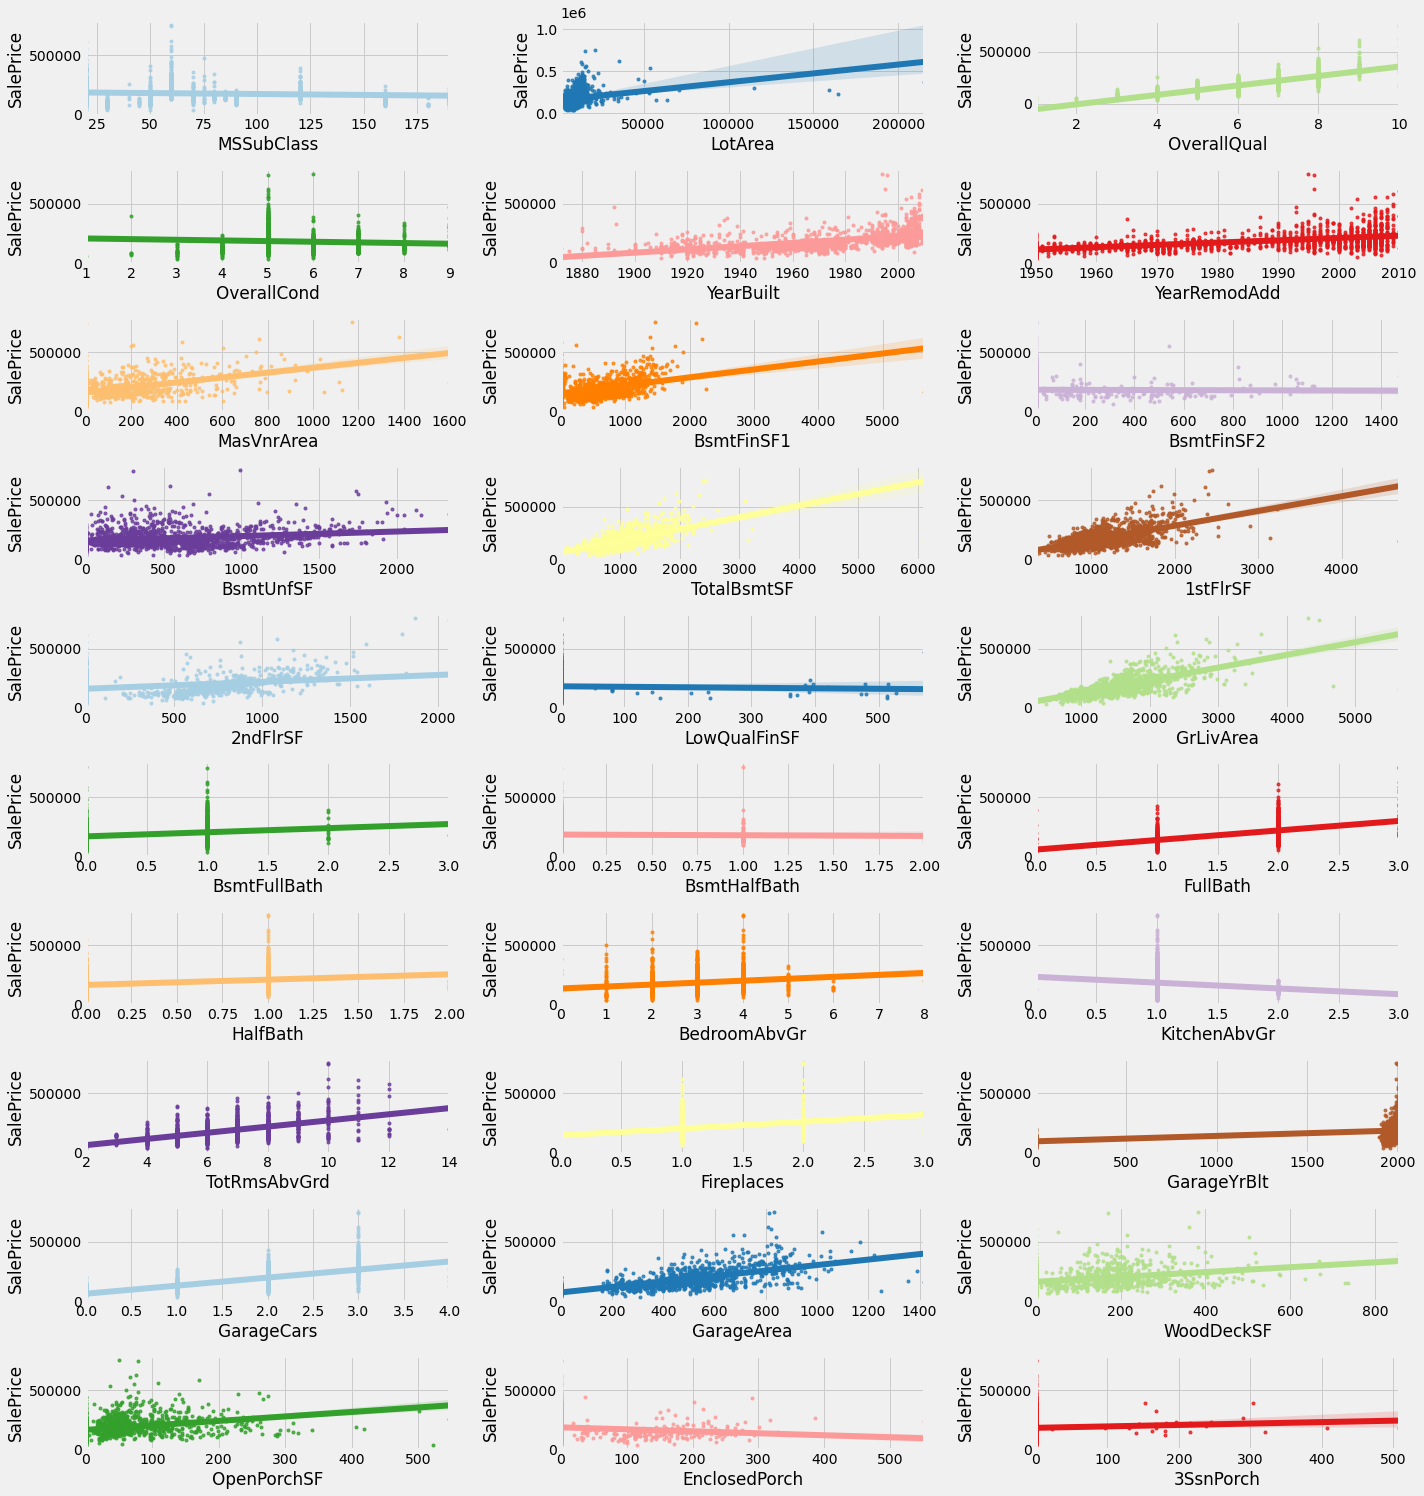

In [33]:
#For 25 int and 4 float values 10 x 3 cells are used
numRows = 10
numCols = 3
 
fig, axes = plt.subplots(numRows, numCols,figsize=(20,21))
palette= sns.color_palette("Paired", 40)

numerical_cols = trainCo.dtypes[trainCo.dtypes != "object"].index
listNum = list(numerical_cols)

x=-1
for num in range(0, numRows):
    for col in range(0, numCols):  
        i = num * numCols + col
        if i < len(listNum):
            x += 1
            sns.regplot(trainCo[listNum[i]], trainCo['SalePrice'], ax = axes[num][col],color = palette[x],marker=".")  
plt.tight_layout()    
plt.show()   

In [34]:
#Removing some outliers
train_data = train_data.drop(train_data[(train_data['LotArea']>50000)].index)
train_data = train_data.drop(train_data[(train_data['MasVnrArea']>1000)].index)
train_data = train_data.drop(train_data[(train_data['GarageArea']>1200)].index)
train_data = train_data.drop(train_data[(train_data['OpenPorchSF']>400)].index)
train_data = train_data.drop(train_data[(train_data['EnclosedPorch']>300)].index)
train_data = train_data.drop(train_data[(train_data['GrLivArea']>4000)].index)
train_data = train_data.drop(train_data[(train_data['WoodDeckSF']>600)].index)

**Calculation of Z-score**

*Mathematical method of identifying outliers*

**Encoding For the categorical features**

*Check for unique values*
*Encode*

In [35]:
categorical_data = train_data.select_dtypes(include='object').copy()
#for feature in features:
count = [len(train_data[features].unique()) for features in categorical_data]
data_tuples = list(zip(categorical_data,count))
data = pd.DataFrame(data_tuples, columns=['Features','Number of distinct values'])
data

,Features,Number of distinct values
0,MSZoning,5
1,Street,2
2,LotShape,4
3,LandContour,4
4,Utilities,2
5,LotConfig,5
6,LandSlope,3
7,Neighborhood,25
8,Condition1,9
9,Condition2,6


**Dilemma between using ONEHOTENCODER  and LABELENCODER**
* LabelEncoder will intoduce some relationship to the data set
* OneHotEncoder will increase the features of the dataframe considerably

In [36]:
#Using oneHotEncoding for all categorical features
train_copy = train_data.copy()
for c in categorical_data:
    label_encoder = LabelEncoder() 
    label_encoder.fit(list(train_copy[c].values)) 
    train_copy[c] = label_encoder.transform(list(train_copy[c].values))
    
train_data=train_copy.copy()
train_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1423 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1423 non-null   int64  
 1   MSZoning       1423 non-null   int32  
 2   LotArea        1423 non-null   int64  
 3   Street         1423 non-null   int32  
 4   LotShape       1423 non-null   int32  
 5   LandContour    1423 non-null   int32  
 6   Utilities      1423 non-null   int32  
 7   LotConfig      1423 non-null   int32  
 8   LandSlope      1423 non-null   int32  
 9   Neighborhood   1423 non-null   int32  
 10  Condition1     1423 non-null   int32  
 11  Condition2     1423 non-null   int32  
 12  BldgType       1423 non-null   int32  
 13  HouseStyle     1423 non-null   int32  
 14  OverallQual    1423 non-null   int64  
 15  OverallCond    1423 non-null   int64  
 16  YearBuilt      1423 non-null   int64  
 17  YearRemodAdd   1423 non-null   int64  
 18  RoofStyl

In [37]:
test_copy = test_data.copy()
categorical_data = [features for features in test_copy.columns if test_copy[features].dtype == 'O']
    
for c in categorical_data:
    label_encoder = LabelEncoder() 
    label_encoder.fit(list(test_copy[c].values)) 
    test_copy[c] = label_encoder.transform(list(test_copy[c].values))
    
test_data=test_copy.copy()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   int32  
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   int32  
 4   LotShape       1459 non-null   int32  
 5   LandContour    1459 non-null   int32  
 6   Utilities      1459 non-null   int32  
 7   LotConfig      1459 non-null   int32  
 8   LandSlope      1459 non-null   int32  
 9   Neighborhood   1459 non-null   int32  
 10  Condition1     1459 non-null   int32  
 11  Condition2     1459 non-null   int32  
 12  BldgType       1459 non-null   int32  
 13  HouseStyle     1459 non-null   int32  
 14  OverallQual    1459 non-null   int64  
 15  OverallCond    1459 non-null   int64  
 16  YearBuilt      1459 non-null   int64  
 17  YearRemodAdd   1459 non-null   int64  
 18  RoofStyl

In [38]:
z = np.abs(stats.zscore(train_data))
u = np.abs(stats.zscore(test_data))
print(z)

[[0.07600205 0.05305707 0.29885535 ... 0.31081621 0.20817739 0.40503938]
 [0.87165116 0.05305707 0.03624798 ... 0.31081621 0.20817739 0.042226  ]
 [0.07600205 0.05305707 0.3405365  ... 0.31081621 0.20817739 0.60660237]
 ...
 [0.87165116 0.05305707 0.7801184  ... 0.31081621 0.20817739 0.42519568]
 [0.31291536 0.05305707 0.16366965 ... 0.31081621 0.20817739 1.18441628]
 [0.87165116 0.05305707 0.00953054 ... 0.31081621 0.20817739 0.48687685]]


In [ ]:
#train_data_o = train_data[(z < 6).all(axis=1)]
#test_data_o = test_data[(z < 6).all(axis=1)]
#train_data_o.shape

In [ ]:
test_data.shape

# **Checking the Four Assumptions**
*Before moving on to building the regression model, we must test the assumptions underlying the statistical bases for multivariate analysis.*

1. Correlation (interdependence of variable quantities)

Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.



In [ ]:
plt.figure(figsize=(30, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(train_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(train_data.corr(), mask=mask, vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':22}, pad=16);

* With the large feature types it is difficult to guage clearly tthe correlation of individual feature to target feature
* filter out high correlated value using function

In [ ]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    for i , index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            feature.append(index)
            value.append(corrdata[index])
    df2 = pd.DataFrame(data = value, index=feature, columns=['corr value'] )
    return df2
correlate = train_data.corr()
corr_df = getCorrelatedFeature(correlate['SalePrice'], 0.3)
corr_df.sort_values(by=['corr value'],ascending=False)

2. Linearity
The most common way to assess linearity is to examine scatter plots and search for linear patterns. If you fit a linear model to a non-linear, non-additive data set, the regression algorithm would fail to capture the trend mathematically, resulting in a poor model performance.


3. Homoscedasticity
Homoscedasticity refers to the assumption that dependent variable(s) exhibit equal, constant levels of variance across the range of predictor variable(s).

4. Normality of Errors
The data should look like a normal distribution. Several statistic tests, like the t-tests, z-test rely on the normal distribution of error terms.

In [ ]:
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())
print()
fig, ax = plt.subplots(1,2, figsize=(16,4))
sns.distplot(train_data['SalePrice'] , fit=norm, ax=ax[0])
#Get also the QQ-plot
res = stats.probplot(train_data['SalePrice'],plot=ax[1])
plt.show()

The figures show that the target variable has peakedness, and the QQ plot shows that the target variable "SalePrice" has right (positive) skewness.

We will apply log transformation to make the variables normally distributed, i.e, achieve normality of errors.

In [ ]:
train_data['SalePrice'] = np.log(train_data['SalePrice'])

In [ ]:
print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())
print()
fig, ax = plt.subplots(1,2, figsize=(12,4))
sns.distplot(train_data['SalePrice'] , fit=norm, ax=ax[0])
#Get also the QQ-plot
res = stats.probplot(train_data['SalePrice'],plot=ax[1])
plt.show()

The heteroscedasticity has been removed now, owing to the log transformation that we put 'Saleprice' through.

Note : Heteroscedasticity where the spread is close to proportional to the conditional mean will tend to be improved by taking log(y), but if it's not increasing with the mean at close to that rate (or more), then the heteroscedasticity will often be made worse by that transformation.

Box-Cox Transformation
We will now apply box-cox transformation on the training data so as to normalize our training attributes as well.

In [ ]:

combined_data = pd.concat([train_data, test_data],axis = 0)
combined_data.drop(['SalePrice'],axis = 1, inplace = True)

# Box-Cox Transformation
**We will now apply box-cox transformation on the training data so as to normalize our training attributes as well.**

In [ ]:
#Box-cox transformation on training_data and test_data

numeric_feats =combined_data.dtypes[combined_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = combined_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

In [ ]:
#skewness = skewness[abs(skewness) > 0.75]

#from scipy.special import boxcox1p
#skewed_features = skewness.index
#lambda_value = 0.15
#for feat in skewed_features:
 #   combined_data[feat] = boxcox1p(combined_data[feat], lambda_value)

In [ ]:
numeric_feats =test_data.dtypes[test_data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = test_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness = skewness[abs(skewness) > 0.75]

#skewed_features = skewness.index
#lambda_value = 0.15
#for feat in skewed_features:
#    test_data[feat] = boxcox1p(test_data[feat], lambda_value)

# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

#final_data=train_data_o.copy()
#final_data.drop(['SalePrice'],axis=1)
#X_train=final_data
#X_train= X_train.drop(['SalePrice'],axis=1)
#y_train=train_data_o['SalePrice'].values

#feature_sel_model = SelectFromModel(Lasso(alpha=0.015,random_state=0))
#feature_sel_model.fit(X_train,y_train)
#feature_sel_model.get_support()

#total_selected=X_train.columns[(feature_sel_model.get_support())]
#len(total_selected)
#X_train = X_train[total_selected]
#X_test=test_data_o[total_selected]

In [ ]:
final_data=train_data.copy()
final_data.drop(['SalePrice'],axis=1)
X_train=final_data
X_train= X_train.drop(['SalePrice'],axis=1)
y_train=train_data['SalePrice'].values
X_test=test_data

# Building Model

In [ ]:
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import make_scorer,r2_score
from sklearn.metrics import mean_squared_error

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits=7,shuffle=True,random_state=42)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model,X_train,y_train,cv=cv,scoring=r2)
    score = [r2_val_score.mean()]
    return score

In [ ]:
X_test.shape

In [ ]:
X_train.shape

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
LR = LinearRegression(normalize=True, n_jobs=-1)
LR.fit(X_train,y_train)
test_model(LR)

**Ridge Regression**

In [ ]:
RidR = Ridge(alpha = 0.5, normalize=True)
RidR.fit(X_train,y_train)
test_model(RidR)

**Lasso Regression**

In [ ]:
LasR = Lasso(alpha = 0.001, normalize=True)
LasR.fit(X_train,y_train)
test_model(LasR)

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTree = DecisionTreeRegressor(max_depth=8)
DTree.fit(X_train,y_train)
test_model(DTree)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state = 42)
RF.fit(X_train,y_train)
test_model(RF)

**Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
test_model(ENet)

**XGBoost**

In [ ]:
import xgboost
xgb = xgboost.XGBRegressor(learning_rate=0.05, max_depth=3, random_state=4)
xgb.fit(X_train,y_train)
test_model(xgb)

**Support Vector Machine**

In [ ]:
from sklearn.svm import SVR
Svm = SVR(kernel='rbf')
test_model(Svm)

**Light Gradient Boosting**

In [ ]:
import lightgbm as lgb
model_lgb = lgb.Dataset(X_train, y_train)
params ={ 'objective':'regression',
        'task': 'train',
        'boosting_type': 'gbdt',
        'num_leaves': 42,
        'metric': {'15'},
        'learning_rate': 0.1, 
        'bagging_fraction': 0.8,
        'bagging_freq' : 5,
        'feature_fraction':0.9, 
        'min_data_in_leaf' : 6,
        } 
prediction = lgb.train(params, model_lgb)
y_predict = prediction.predict(X_test)
y_predict = np.expm1(y_predict)

In [ ]:
pred=np.exp(prediction.predict(X_test)).round(2)

In [ ]:
submit_test = pd.concat([test_ID,pd.DataFrame(pred)],axis=1)
submit_test.columns = ['Id','SalePrice']
submit_test

In [ ]:
submit_test.to_csv('submission.csv', index=False)